In [23]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

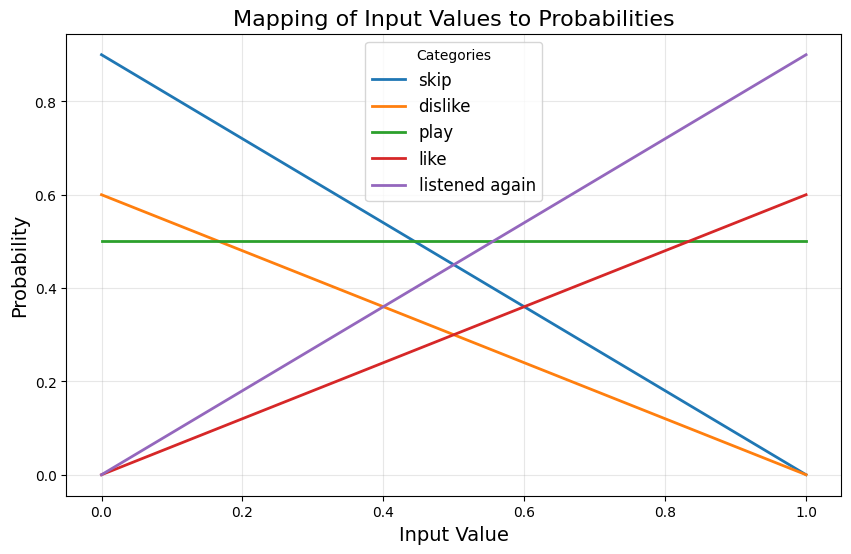

In [ ]:
from math import pi, sqrt
from typing import List


def calculate_probabilities(n: float, linear=False) -> List[float]:
    if linear:
        skip_prob = (0.9 * (1 - n),)  # skip: more likely as n -> 0
        dislike_prob = (0.6 * (1 - n),)  # dislike: more likely as n -> 0
        play_prob = (0.5,)  # play: constant probability
        like_prob = (0.6 * n,)  # like: more likely as n -> 1
        listened_again_prob = (0.9 * n,)  # listened again: more likely as n -> 1
    else:
        skip_prob = 1 - 1 / (1 + exp(0.44439 - 10 * (n - 0.25)))
        dislike_prob = (1 - 1 / (1 + exp(-10 * (n - (1 - 0.6))))) * 0.8
        mu, sigma = 0.5, 0.2
        play_prob = (
            1 / sqrt(2 * pi * sigma**2) * exp(-0.5 * (n - mu) ** 2 / sigma**2)
        )  # Gaussian
        play_prob = play_prob / 4.5  # to go near x=0.4 y=0.4 and x=0.6 y=0.4
        like_prob = (1 / (1 + exp(-10 * (n - 0.6)))) * 0.8
        listened_again_prob = 1 / (1 + exp(-(1.4444 + 10 * (n - 0.85))))

    return like_prob, dislike_prob, play_prob, skip_prob, listened_again_prob


def probabilistic_model_numpy(input_value: float):
    if not (0.0 <= input_value <= 1.0):
        raise ValueError("Input value must be in range [0,1].")

    categories = ["like", "dislike", "play", "skip", "listened again"]

    like_prob, dislike_prob, play_prob, skip_prob, listened_again_prob = (
        calculate_probabilities(input_value)
    )

    # print(probabilities)

    probabilities = np.array(
        [like_prob, dislike_prob, play_prob, skip_prob, listened_again_prob]
    )
    probabilities /= probabilities.sum()

    output = np.random.choice(categories, p=probabilities)
    return output


input_values = np.linspace(0, 1, 100)  # 100 points between 0 and 1
probabilities = {
    "skip": [],
    "dislike": [],
    "play": [],
    "like": [],
    "listened again": [],
}

# Compute probabilities for each input value
for i in input_values:
    prob = calculate_probabilities(i)

    probabilities["like"].append(prob[0])
    probabilities["dislike"].append(prob[1])
    probabilities["play"].append(prob[2])
    probabilities["skip"].append(prob[3])
    probabilities["listened again"].append(prob[4])

# Plot probabilities
plt.figure(figsize=(10, 6))
for category, values in probabilities.items():
    plt.plot(input_values, values, label=category, linewidth=2)

# Add labels, legend, and grid
plt.title("Mapping of Input Values to Probabilities", fontsize=16)
plt.xlabel("Input Value", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(title="Categories", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [65]:
for input in np.linspace(0, 1, 100):
    # input = np.random.rand()
    output = probabilistic_model_numpy(input)

    print(f"Input: {input:.2f} -> Output: {output}")

Input: 0.00 -> Output: dislike
Input: 0.01 -> Output: dislike
Input: 0.02 -> Output: skip
Input: 0.03 -> Output: dislike
Input: 0.04 -> Output: skip
Input: 0.05 -> Output: skip
Input: 0.06 -> Output: skip
Input: 0.07 -> Output: skip
Input: 0.08 -> Output: skip
Input: 0.09 -> Output: dislike
Input: 0.10 -> Output: skip
Input: 0.11 -> Output: skip
Input: 0.12 -> Output: dislike
Input: 0.13 -> Output: skip
Input: 0.14 -> Output: dislike
Input: 0.15 -> Output: dislike
Input: 0.16 -> Output: dislike
Input: 0.17 -> Output: dislike
Input: 0.18 -> Output: dislike
Input: 0.19 -> Output: skip
Input: 0.20 -> Output: skip
Input: 0.21 -> Output: dislike
Input: 0.22 -> Output: dislike
Input: 0.23 -> Output: skip
Input: 0.24 -> Output: dislike
Input: 0.25 -> Output: dislike
Input: 0.26 -> Output: skip
Input: 0.27 -> Output: play
Input: 0.28 -> Output: skip
Input: 0.29 -> Output: dislike
Input: 0.30 -> Output: dislike
Input: 0.31 -> Output: play
Input: 0.32 -> Output: dislike
Input: 0.33 -> Output: di

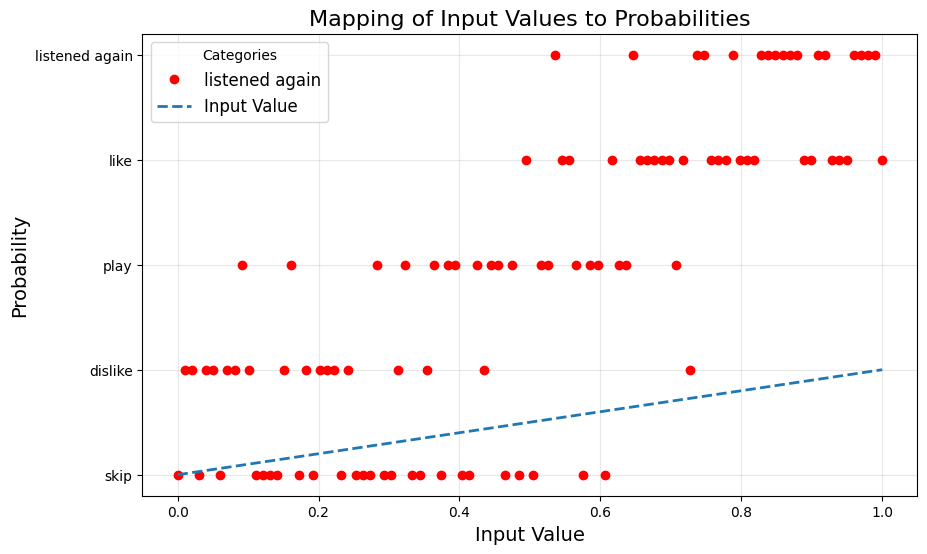

In [78]:
input_values = np.linspace(0, 1, 100)  # 100 points between 0 and 1
probs = []

# Compute probabilities for each input value
for i in input_values:
    prob = probabilistic_model_numpy(i)

    probs.append(prob)

# Plot probabilities
plt.figure(figsize=(10, 6))
plt.plot(input_values, probs, "ro", label=category, linewidth=2)
plt.plot(input_values, input_values, label="Input Value", linewidth=2, linestyle="--")

# Add labels, legend, and grid
plt.title("Mapping of Input Values to Probabilities", fontsize=16)
plt.xlabel("Input Value", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(title="Categories", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

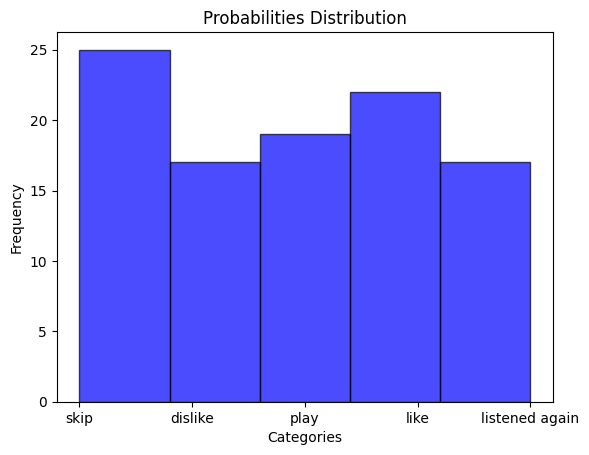

In [79]:
# plot probs distribution
plt.hist(probs, bins=5, color="blue", edgecolor="black", alpha=0.7)
plt.title("Probabilities Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.show()